# Prétraitements élémentaires sur les images

In [22]:
# Importer les modules nécessaires
import cv2
import matplotlib.pyplot as plt
import skimage as ski
import numpy as np

### <span style=color:green> Lecture et Propriétés d'images</span>

In [23]:
# Lire l'image couleur ball
ball_bgr = cv2.imread("Images/ball.jpg", cv2.IMREAD_COLOR) # image en espace de couleur BGR

# Afficher le type de l'image ball
print(type(ball_bgr))

# Afficher le type de valeur des pixels
print(type(ball_bgr[0,0,1])) 

# Afficher les valeurs BGR du pixel (50,60)
print(ball_bgr[50,60])

# Afficher uniquement la valeur du vert
print(ball_bgr[50,50,2])

# Afficher sa Définition et le nombre de canaux (3 ici pour RGB)
print(f"hauteur, largeur, canaux : {ball_bgr.shape}")

# Calculer sa taille en Mo = Définition (en pixels) * profondeur (en bits par pixel)
hauteur = ball_bgr.shape[0] 
largeur = ball_bgr.shape[1]
profondeur = 24  # 3 canaux RGB pour 8 bits/pixels
taille_mo = (hauteur * largeur * profondeur) / (8*1024*1024) # conversion en Octets puis en Mo
print(f"La taille de l'image est : {taille_mo:.3f} Mo")


<class 'numpy.ndarray'>
<class 'numpy.uint8'>
[  2 200 134]
179
hauteur, largeur, canaux : (427, 640, 3)
La taille de l'image est : 0.782 Mo


### <span style=color:green> Changement d'espace de couleurs <span> 

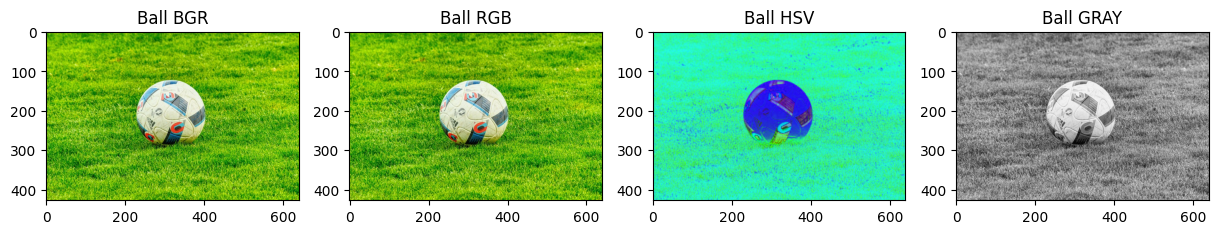

In [24]:
# Il existe une varité de façons proposées par OpenCV
ball_rgb = cv2.cvtColor(ball_bgr, cv2.COLOR_BGR2RGB) # Espace RGB initial
ball_hsv = cv2.cvtColor(ball_bgr, cv2.COLOR_BGR2HSV) # Espace HSV
ball_gray = cv2.cvtColor(ball_bgr, cv2.COLOR_BGR2GRAY) # Espace YUV

# Afficher les différents espaces
plt.figure(figsize=[15,15]) # fenêtre d'affichage de hauteur et largeur = 15 pouces
plt.subplot(141); plt.imshow(ball_bgr[:,:,::-1]); plt.title("Ball BGR")
plt.subplot(142); plt.imshow(ball_rgb); plt.title("Ball RGB")
plt.subplot(143); plt.imshow(ball_hsv); plt.title("Ball HSV")
plt.subplot(144); plt.imshow(ball_gray, cmap='gray'); plt.title("Ball GRAY")
plt.show()

### <span style=color:green> Changement de définition (size) </span>

aspect ratio : 1.4988290398126465
aspect ratio 1 : 1.5
aspect ratio 2 : 1.502145922746781


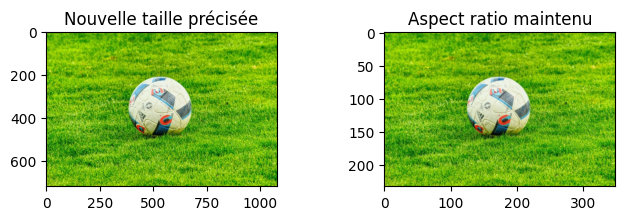

In [25]:
# Calculer l'aspect ratio de l'image originale ball
print(f"aspect ratio : {ball_bgr.shape[1] / ball_bgr.shape[0]}")

# En précisant les nouvelles valeurs de la hauteur et la largeur
# La valeur de l'interpolation dépend si l'on agrandit ou rétrécit
nouv_hauteur = 720
nouv_largeur = 1080
ball_bgr1 = cv2.resize(ball_bgr, dsize=(nouv_largeur, nouv_hauteur), interpolation = cv2.INTER_LINEAR) # Agrandir
# Calculer l'aspect ratio de la nouvelle image 
print(f"aspect ratio 1 : {ball_bgr1.shape[1] / ball_bgr1.shape[0]}")

# En maintenant l'aspect ratio
nouv_largeur = 350
aspect_ratio = nouv_largeur / ball_bgr.shape[1]
nouv_hauteur = int(ball_bgr.shape[0] * aspect_ratio)
dim = (nouv_largeur, nouv_hauteur)
ball_bgr2 = cv2.resize(ball_bgr, dsize=dim, interpolation=cv2.INTER_AREA) # Rétrécir
# Calculer l'aspect ratio de la nouvelle image
print(f"aspect ratio 2 : {ball_bgr2.shape[1] / ball_bgr2.shape[0]}")

# Afficher les résultats
plt.figure(figsize=[8,2])
plt.subplot(121); plt.imshow(ball_bgr1[:,:,::-1]); plt.title("Nouvelle taille précisée")
plt.subplot(122); plt.imshow(ball_bgr2[:,:,::-1]); plt.title("Aspect ratio maintenu")
plt.show()

### <span style=color:green> Changement Géométrique </span>

On peut utiliser la fonction rotate de skimage pour faire pivoter l'image rapidement.

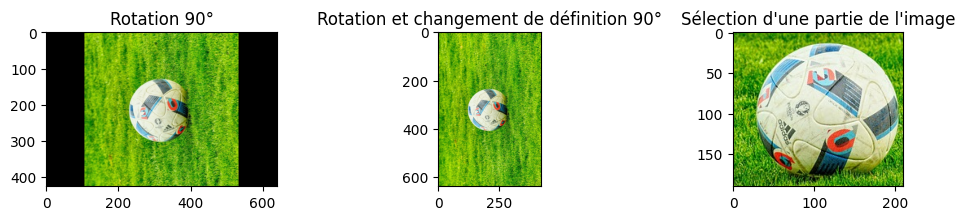

In [26]:
# Faire pivoter l'image d'un angle quelconque autour de son centre
ball_bgr_rotate1 = ski.transform.rotate(ball_bgr, angle=90, resize=False, center=None)
ball_bgr_rotate2 = ski.transform.rotate(ball_bgr, angle=90, resize=True, center=None) # resize = True

# Sélectionner une partie de l'image, ici le ballon centre
ball_bgr_centre = ball_bgr[110:300, 200:410]

# Afficher les transformations
plt.figure(figsize=[12,2])
plt.subplot(131); plt.imshow(ball_bgr_rotate1[:,:,::-1]); plt.title("Rotation 90°")
plt.subplot(132); plt.imshow(ball_bgr_rotate2[:,:,::-1]); plt.title("Rotation et changement de définition 90°")
plt.subplot(133); plt.imshow(ball_bgr_centre[:,:,::-1]); plt.title("Sélection d'une partie de l'image")
plt.show()

### <span style=color:green> Améliorer la luminosité ou la clarté<span>

[117 176   8]
[ 67 126   0]
[167 226  58]


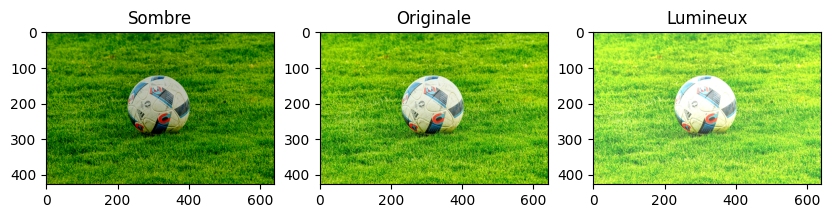

In [27]:
# Afficher la valeur de (0,0) avant changement
print(ball_rgb[0,0])
# Créer une matrice de un
ones_matrix = np.ones(ball_rgb.shape, dtype=np.uint8) * 50

# Diminuer la luminosité
ball_rgb_dark = cv2.subtract(ball_rgb, ones_matrix)
# Afficher la valeur de (0,0) avant changement
print(ball_rgb_dark[0,0])

# Augmenter la luminosité
ball_rgb_bright = cv2.add(ball_rgb, ones_matrix)
print(ball_rgb_bright[0,0])

# Afficher les résultats
plt.figure(figsize=[10,4])
plt.subplot(131); plt.imshow(ball_rgb_dark); plt.title("Sombre")
plt.subplot(132); plt.imshow(ball_rgb); plt.title("Originale")
plt.subplot(133); plt.imshow(ball_rgb_bright); plt.title("Lumineux")
plt.show() 


### <span style=color:green> Améliorer le contraste </span>

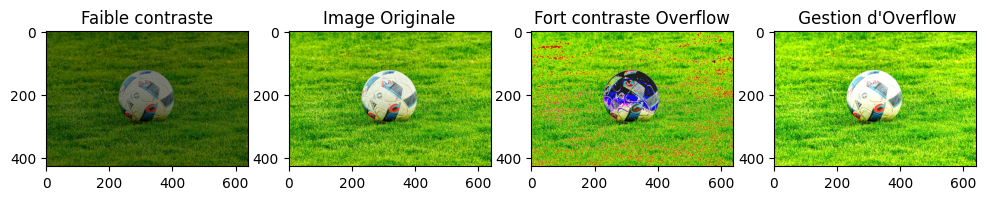

In [28]:
# Créer des matrices pour diminuer ou augmenter le contraste
matrix1 = np.ones(ball_rgb.shape) * 0.5
matrix2 = np.ones (ball_rgb.shape) * 1.2

# Faible contraste
low_contrast = np.uint8(cv2.multiply(np.float64(ball_rgb), matrix1))

# Fort contraste
high_contrast = np.uint8(cv2.multiply(np.float64(ball_rgb), matrix2))

# Après ça, il y a overflow : débordement de l'espace mémoire
new_high_contrast = np.uint8(np.clip(cv2.multiply(np.float64(ball_rgb), matrix2), 0, 255))

# Afficher les résultats
plt.figure(figsize=[12,4])
plt.subplot(141); plt.imshow(low_contrast); plt.title("Faible contraste")
plt.subplot(142); plt.imshow(ball_rgb); plt.title("Image Originale")
plt.subplot(143); plt.imshow(high_contrast); plt.title("Fort contraste Overflow")
plt.subplot(144); plt.imshow(new_high_contrast); plt.title(" Gestion d'Overflow")
plt.show()